In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [244]:
df=pd.read_csv("Train_Set.csv")

df.head()

,OrderId,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,Dept_Id,Dept_Name,Profit_Ratio,Discount,Quantity,Order_Profit,Product_type,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder,Delivery_Status
0,2477882,12386,Consumer,AR,19120,150.000000,Central,4383.390000,Cat-2,UPI,4,Apparel,0.080000,0.100000,3,352.780000,Fragile,17,191.000000,1592.000000,0,Standard,4,NORTH,5.000000,2.000000,0,0
1,2477895,2630,Consumer,BR,2907,165.000000,East,4295.720000,Cat-2,UPI,4,Apparel,0.470000,0.160000,3,2018.100000,Fragile,17,79.000000,1420.000000,0,Standard,6,NORTH,2.000000,2.000000,1,0
2,2473260,1752,Corporate,RJ,90214,171.000000,South,3616.650000,Cat-50,Cash,7,Fan Shop,0.260000,0.070000,4,939.630000,Not Fragile,46,67.000000,1231.000000,0,Standard,6,SOUTH,4.000000,2.000000,0,1
3,2466916,9268,Consumer,UP,745,132.000000,East,9175.860000,Cat-12,Credit,4,Apparel,0.480000,0.180000,1,4401.740000,Not Fragile,18,45.000000,nan,1,2A,4,NORTH,4.000000,3.000000,1,1
4,2351480,2888,Corporate,UP,92427,nan,North,2779.290000,Cat-3,UPI,5,Golf,0.130000,0.160000,4,361.700000,Not Fragile,29,43.000000,1018.000000,1,Standard,5,CENTRAL,2.000000,1.000000,0,1


In [245]:
df.dtypes

OrderId                 int64
Customer_Id             int64
Customer_Category      object
Cust_State             object
Zipcode                 int64
Sales                 float64
Order_zone             object
Price                 float64
CategoryName           object
Transcation            object
Dept_Id                 int64
Dept_Name              object
Profit_Ratio          float64
Discount              float64
Quantity                int64
Order_Profit          float64
Product_type           object
Prod_Category_Id        int64
ProductLength         float64
ProductWeight         float64
Dispatched              int64
Shipping_Class         object
Scheduled_Shipping      int64
Warehouse_Region       object
Delivery_Review       float64
Session_Ordered       float64
WeekdayOrder            int64
Delivery_Status         int64
dtype: object

In [246]:
plt.rcParams['figure.figsize']=[16,12]

In [247]:
df.shape

(126363, 28)

In [248]:
df.isnull().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                 3614
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount              5050
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         2946
ProductWeight          695
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       9065
Session_Ordered       4792
WeekdayOrder             0
Delivery_Status          0
dtype: int64

In [249]:
X=df.drop("Delivery_Status",axis=1)

y=df['Delivery_Status']

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [252]:
X_train.isnull().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                 2538
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount              3571
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         2055
ProductWeight          466
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       6282
Session_Ordered       3300
WeekdayOrder             0
dtype: int64

In [253]:
y_train.isnull().sum()

0

In [254]:
y_test.isnull().sum()

0

In [255]:
X_test.isnull().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                 1076
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount              1479
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength          891
ProductWeight          229
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       2783
Session_Ordered       1492
WeekdayOrder             0
dtype: int64

[['Sales','Discount','ProductLength','ProductWeight','Delivery_Review','Session_Ordered'
   ]]

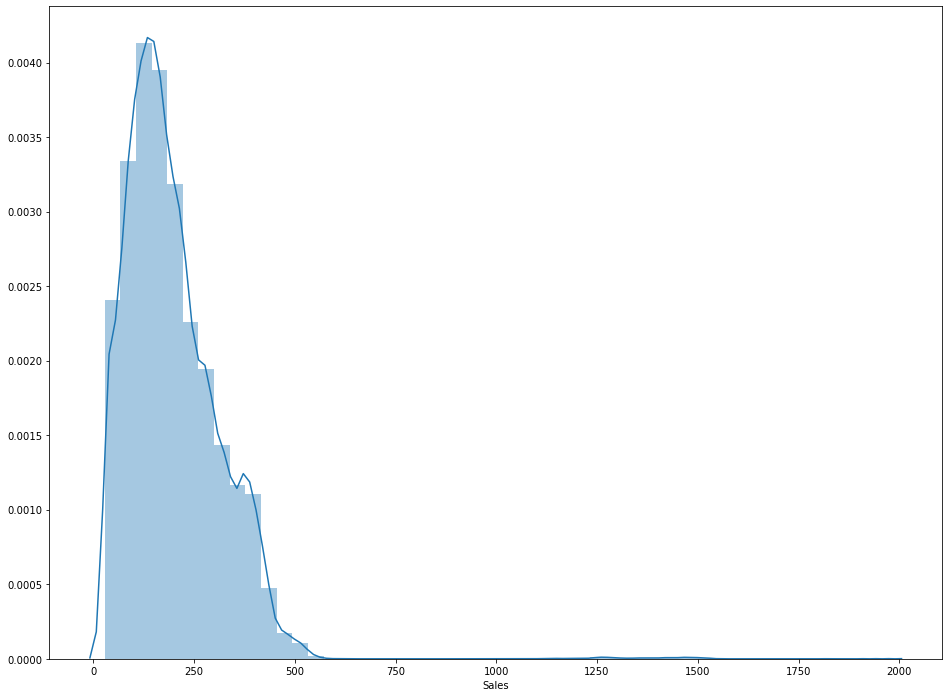

In [256]:
sns.distplot(X_train['Sales'])

In [257]:
X_train['Sales'].skew()

2.771667131956165

In [258]:
#Sales is positivelyskewed ,we replace null values with median

df['Sales'].median()

173.0

In [259]:
X_train['Sales'].replace(np.NaN,X_train['Sales'].median(),inplace=True)


In [260]:
X_train['Sales'].isnull().any()

False

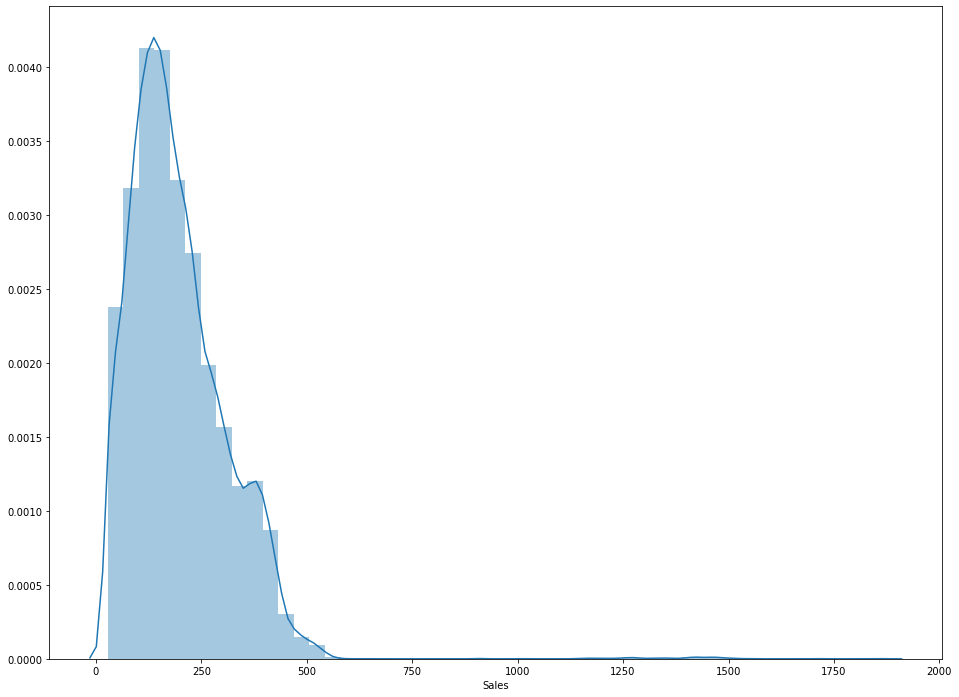

In [261]:
sns.distplot(X_test['Sales'])

In [262]:
X_test['Sales'].skew()

2.6679814062951626

In [263]:
X_test['Sales'].replace(np.NaN,X_test['Sales'].median(),inplace=True)


In [264]:
df.nunique()

OrderId               126363
Customer_Id            16707
Customer_Category          3
Cust_State                18
Zipcode                 6713
Sales                    760
Order_zone                 5
Price                  96721
CategoryName              50
Transcation                4
Dept_Id                   11
Dept_Name                 11
Profit_Ratio             134
Discount                  16
Quantity                   5
Order_Profit          113156
Product_type               2
Prod_Category_Id          51
ProductLength            201
ProductWeight          14387
Dispatched                 2
Shipping_Class             4
Scheduled_Shipping         6
Warehouse_Region           5
Delivery_Review            5
Session_Ordered            3
WeekdayOrder               2
Delivery_Status            2
dtype: int64

DISCOUNT

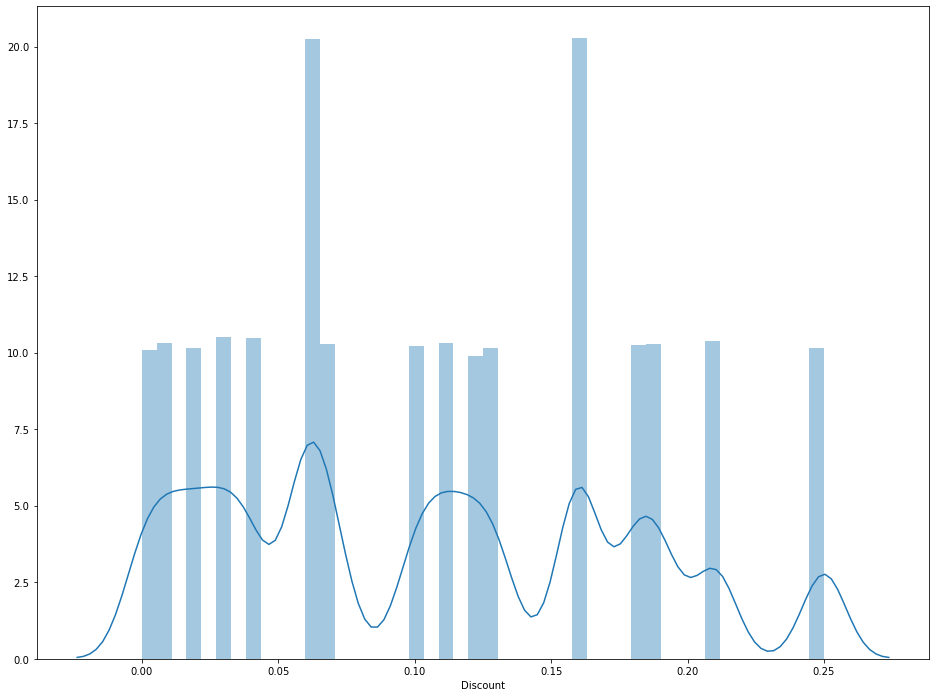

In [265]:
sns.distplot(X_train['Discount'])

In [266]:
X_train['Discount'].skew()

0.2798850457486283

In [267]:
X_train['Discount'].isnull().any()

True

In [268]:
X_train['Discount'].mean()

0.1054487942226569

In [269]:
X_train['Discount'].replace(np.NaN,X_train['Discount'].mean(),inplace=True)

In [270]:
X_train['Discount'].isnull().any()

False

In [271]:
X_test['Discount'].skew()

0.2818859043042675

In [272]:
X_test['Discount'].replace(np.NaN,X_test['Discount'].mean(),inplace=True)

PRODUCT LENGTH

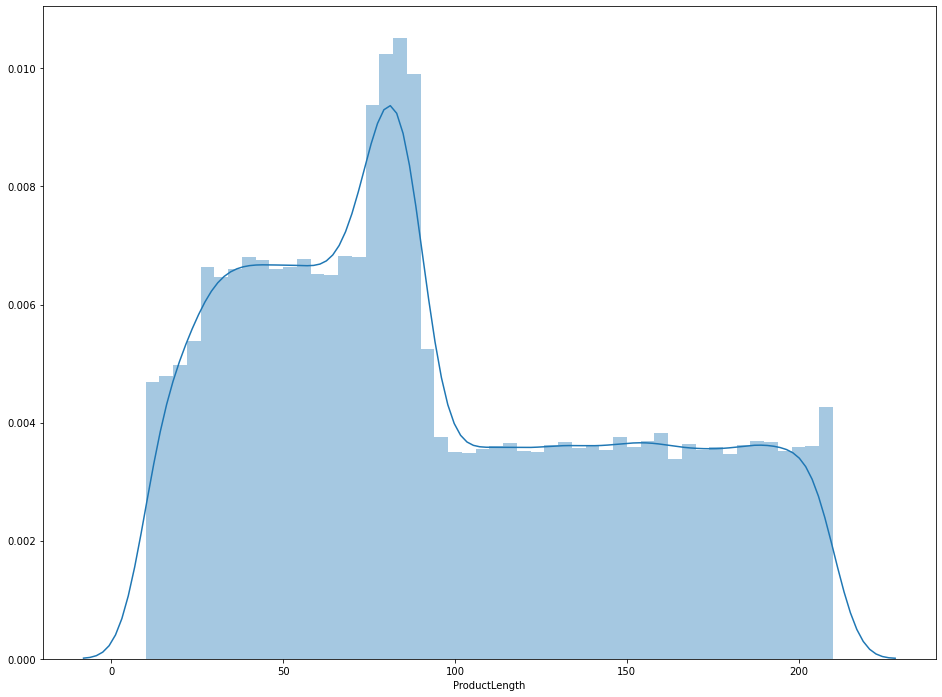

In [273]:
sns.distplot(X_train['ProductLength'])

In [274]:
X_train['ProductLength'].skew()

0.43313099112704007

In [275]:
X_train['ProductLength'].mean()

96.0343753978634

In [276]:
df['ProductLength'].median()

84.0

In [277]:
X_train['ProductLength'].replace(np.NaN,X_train['ProductLength'].mean(),inplace=True)

In [278]:
X_test['ProductLength'].skew()

0.44108105613281096

In [279]:
X_test['ProductLength'].replace(np.NaN,X_test['ProductLength'].mean(),inplace=True)

PRODUCT WEIGHT

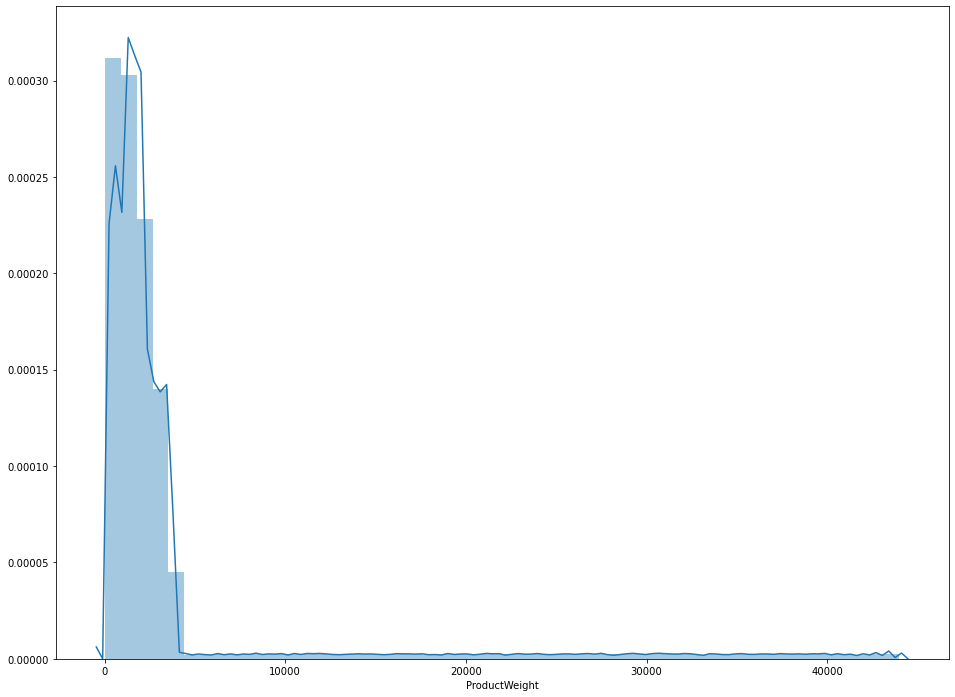

In [280]:
sns.distplot(X_train['ProductWeight'])



In [281]:
X_train['ProductWeight'].skew()

3.5573204630057895

In [282]:
X_train['ProductWeight'].replace(np.NaN,X_train['ProductWeight'].median(),inplace=True)

In [283]:
X_test['ProductWeight'].skew()

3.5762354929726397

In [284]:
X_test['ProductWeight'].replace(np.NaN,X_test['ProductWeight'].median(),inplace=True)

DELIVERY REVIEW

In [285]:
X_train['Delivery_Review'].value_counts()

4.000000    29976
3.000000    28877
2.000000    13849
5.000000     8146
1.000000     1324
Name: Delivery_Review, dtype: int64

In [286]:
X_train['Delivery_Review'].mode()[0]

#Since this is categorical variable,we replace the missing values with mode

4.0

In [287]:
X_train['Delivery_Review'].replace(np.NaN,X_train['Delivery_Review'].mode()[0],inplace=True)

In [288]:
X_test['Delivery_Review'].value_counts()

4.000000    12884
3.000000    12324
2.000000     5883
5.000000     3494
1.000000      541
Name: Delivery_Review, dtype: int64

In [289]:
X_test['Delivery_Review'].replace(np.NaN,X_test['Delivery_Review'].mode()[0],inplace=True)

SESSION ORDERED

In [290]:
X_train['Session_Ordered'].value_counts()

2.000000    28579
3.000000    28346
1.000000    28229
Name: Session_Ordered, dtype: int64

In [291]:
X_train['Session_Ordered'].mode()[0]

#Since this is categorical variable,we replace the missing values with mode

2.0

In [292]:
X_train['Session_Ordered'].replace(np.NaN,X_train['Session_Ordered'].mode()[0],inplace=True)

In [293]:
X_test['Session_Ordered'].value_counts()

2.000000    12294
3.000000    12094
1.000000    12029
Name: Session_Ordered, dtype: int64

In [294]:
X_test['Session_Ordered'].replace(np.NaN,X_test['Session_Ordered'].mode()[0],inplace=True)

# MISSING VALUE TREATMENT COMPLETED

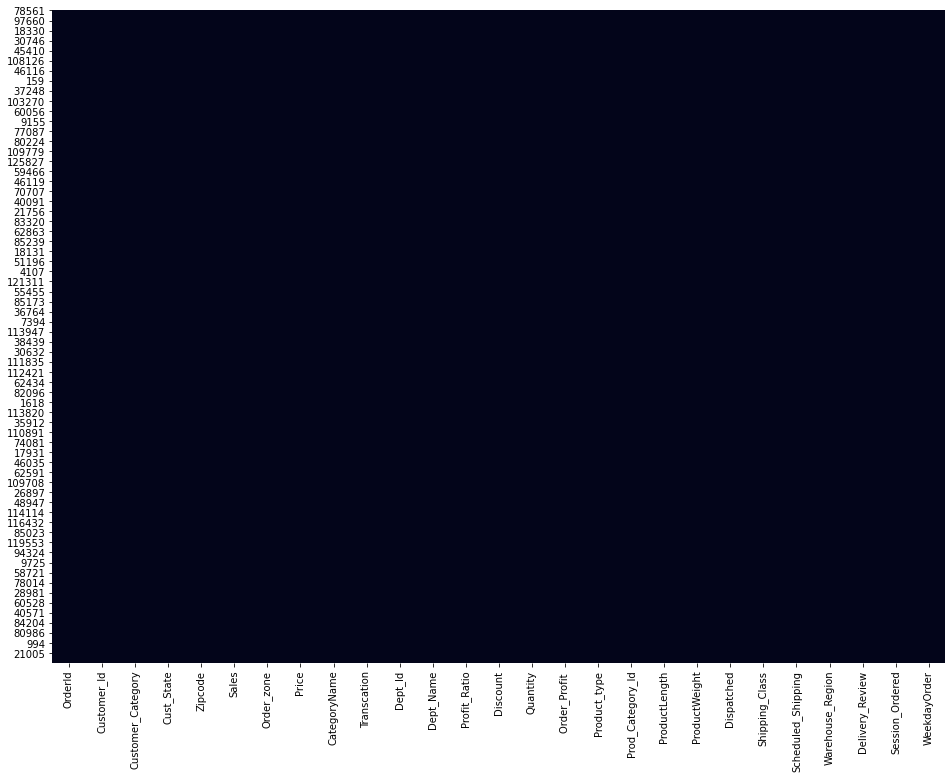

In [295]:
sns.heatmap(X_train.isnull(),cbar=False)

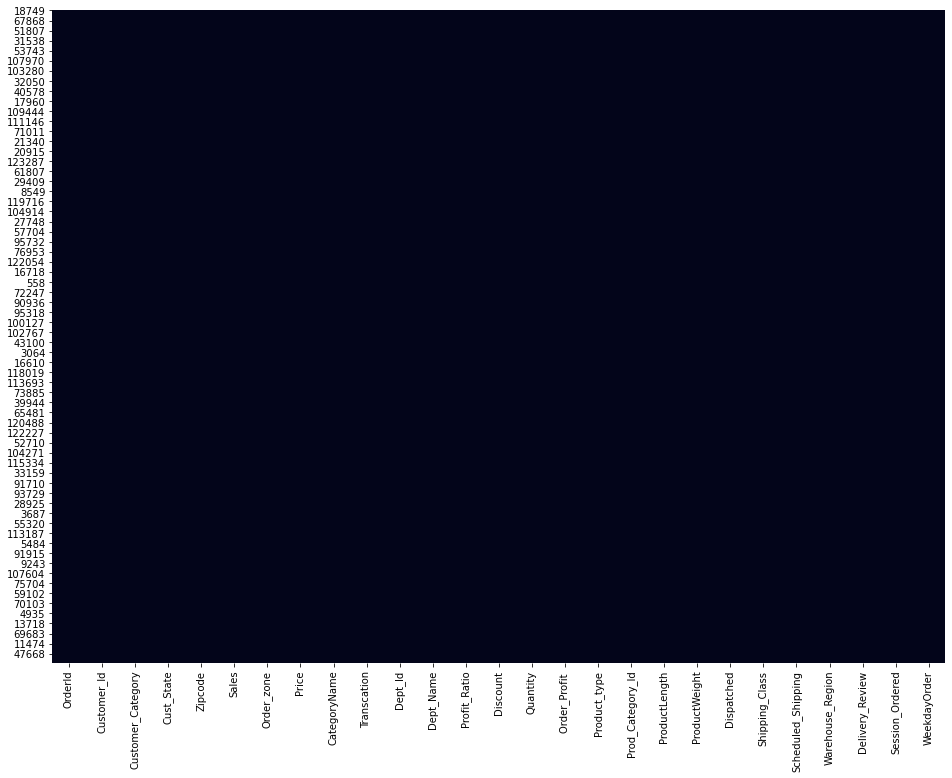

In [296]:
sns.heatmap(X_test.isnull(),cbar=False)

In [297]:
X_train.drop('OrderId',axis=1,inplace=True)  #We drop Order-Id because the there are unique values for each and every perosn

In [298]:
X_test.drop('OrderId',axis=1,inplace=True) 

In [299]:
X_train.drop("Dept_Name",axis=1,inplace=True)   #We drop Department name because already department id column is present.
#IT becomes redundant feature

In [300]:
X_test.drop("Dept_Name",axis=1,inplace=True) 

In [301]:
X_train['Zero_features']=(df==0).astype(int).sum(axis=1)
X_train.head()

,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,Dept_Id,Profit_Ratio,Discount,Quantity,Order_Profit,Product_type,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder,Zero_features
78561,792,Corporate,TEL,93921,200.000000,East,4349.710000,Cat-2,UPI,4,0.280000,0.210000,4,1217.810000,Not Fragile,17,13.000000,2175.000000,1,1A,2,NORTH,4.000000,3.000000,1,0
112331,3424,Consumer,KL,22211,112.000000,South,2276.170000,Cat-5,Credit,6,0.350000,0.030000,4,796.330000,Not Fragile,37,176.000000,1612.000000,1,2A,5,CENTRAL,2.000000,1.000000,1,0
102690,9724,others,UK,735,128.000000,Central,3545.150000,Cat-50,Debit,7,0.260000,0.120000,3,920.250000,Not Fragile,46,137.000000,2156.000000,1,Standard,5,NORTH,3.000000,2.000000,0,1
78383,9014,Corporate,KL,30298,309.000000,West,21395.270000,Cat-13,Debit,7,0.010000,0.110000,1,215.530000,Not Fragile,43,96.034375,2902.000000,0,Standard,5,SOUTH,5.000000,3.000000,0,2
51131,9603,Consumer,AR,735,186.000000,West,7108.010000,Cat-7,UPI,3,0.290000,0.030000,2,2059.750000,Not Fragile,9,72.000000,199.000000,1,Standard,5,SOUTH,3.000000,3.000000,0,2


In [302]:
X_train['Zero_features'].unique()

array([0, 1, 2, 4, 3, 5], dtype=int64)

In [303]:
X_test['Zero_features']=(df==0).astype(int).sum(axis=1)
X_test.head()

,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,Dept_Id,Profit_Ratio,Discount,Quantity,Order_Profit,Product_type,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder,Zero_features
18749,9579,others,AR,92657,156.000000,North,12171.440000,Cat-43,UPI,6,0.350000,0.250000,1,4257.720000,Fragile,34,52.000000,925.000000,1,1A,2,NORTH,3.000000,1.000000,1,0
69373,3078,Consumer,PB,55142,284.000000,North,21390.530000,Cat-13,Debit,7,0.080000,0.060000,1,1712.250000,Not Fragile,43,118.000000,3037.000000,0,Standard,5,SOUTH,4.000000,3.000000,0,2
86999,12135,Corporate,KA,736,153.000000,North,7076.360000,Cat-7,Credit,3,0.410000,0.190000,2,2900.560000,Not Fragile,9,179.000000,3705.000000,0,2A,3,NORTH,4.000000,2.000000,1,2
110971,5519,Consumer,WB,33329,164.000000,East,7075.530000,Cat-7,Debit,3,0.470000,0.160000,2,3323.660000,Fragile,9,62.000000,108.000000,1,Standard,6,SOUTH,2.000000,3.000000,1,1
78355,8283,Consumer,HP,89028,93.000000,West,7077.650000,Cat-7,Debit,3,0.320000,0.010000,1,2265.650000,Not Fragile,9,124.000000,3789.000000,0,Standard,4,WEST,2.000000,3.000000,1,2


Feature Modification of Category Name

In [304]:
('Cat-2'.split('-')[1])

'2'

In [305]:
df['CategoryName'].head(10)

0     Cat-2
1     Cat-2
2    Cat-50
3    Cat-12
4     Cat-3
5     Cat-2
6    Cat-42
7    Cat-13
8    Cat-32
9     Cat-3
Name: CategoryName, dtype: object

In [306]:
def myfunc(x):
    
    
    a=int(x.split('-')[1])
    
    return a

In [307]:
X_train['CategoryName']=X_train['CategoryName'].apply(myfunc)

X_train['CategoryName'].head()

78561      2
112331     5
102690    50
78383     13
51131      7
Name: CategoryName, dtype: int64

In [308]:
X_test['CategoryName']=X_test['CategoryName'].apply(myfunc)

X_test['CategoryName'].head()

18749     43
69373     13
86999      7
110971     7
78355      7
Name: CategoryName, dtype: int64

In [309]:
X_train_num=X_train[['Sales',
        'Price', 
       'Profit_Ratio', 'Discount', 'Order_Profit ', 
        'ProductLength', 'ProductWeight']]

X_train_num.head()

,Sales,Price,Profit_Ratio,Discount,Order_Profit,ProductLength,ProductWeight
78561,200.000000,4349.710000,0.280000,0.210000,1217.810000,13.000000,2175.000000
112331,112.000000,2276.170000,0.350000,0.030000,796.330000,176.000000,1612.000000
102690,128.000000,3545.150000,0.260000,0.120000,920.250000,137.000000,2156.000000
78383,309.000000,21395.270000,0.010000,0.110000,215.530000,96.034375,2902.000000
51131,186.000000,7108.010000,0.290000,0.030000,2059.750000,72.000000,199.000000


In [310]:
X_test_num=X_test[['Sales',
        'Price', 
       'Profit_Ratio', 'Discount', 'Order_Profit ', 
        'ProductLength', 'ProductWeight']]

X_test_num.head()

,Sales,Price,Profit_Ratio,Discount,Order_Profit,ProductLength,ProductWeight
18749,156.000000,12171.440000,0.350000,0.250000,4257.720000,52.000000,925.000000
69373,284.000000,21390.530000,0.080000,0.060000,1712.250000,118.000000,3037.000000
86999,153.000000,7076.360000,0.410000,0.190000,2900.560000,179.000000,3705.000000
110971,164.000000,7075.530000,0.470000,0.160000,3323.660000,62.000000,108.000000
78355,93.000000,7077.650000,0.320000,0.010000,2265.650000,124.000000,3789.000000


In [311]:
#  'Zero features count'

In [314]:
X_train_cat1=X_train[['Dept_Id','Quantity',
           'Prod_Category_Id','Dispatched','CategoryName',
           'Scheduled_Shipping', 'Delivery_Review', 'Session_Ordered', 'WeekdayOrder'
       ]]

X_train_cat1.head()

,Dept_Id,Quantity,Prod_Category_Id,Dispatched,CategoryName,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder
78561,4,4,17,1,2,2,4.000000,3.000000,1
112331,6,4,37,1,5,5,2.000000,1.000000,1
102690,7,3,46,1,50,5,3.000000,2.000000,0
78383,7,1,43,0,13,5,5.000000,3.000000,0
51131,3,2,9,1,7,5,3.000000,3.000000,0


In [315]:
X_test_cat1=X_test[['Dept_Id','Quantity',
           'Prod_Category_Id','Dispatched','CategoryName',
           'Scheduled_Shipping', 'Delivery_Review', 'Session_Ordered', 'WeekdayOrder'
       ]]

X_test_cat1.head()

,Dept_Id,Quantity,Prod_Category_Id,Dispatched,CategoryName,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder
18749,6,1,34,1,43,2,3.000000,1.000000,1
69373,7,1,43,0,13,5,4.000000,3.000000,0
86999,3,2,9,0,7,3,4.000000,2.000000,1
110971,3,2,9,1,7,6,2.000000,3.000000,1
78355,3,1,9,0,7,4,2.000000,3.000000,1


In [316]:
X_train_cat2=X_train[['Customer_Category', 'Cust_State','Order_zone',
           'Transcation','Product_type','Shipping_Class','Warehouse_Region']]

X_train_cat2.head()

,Customer_Category,Cust_State,Order_zone,Transcation,Product_type,Shipping_Class,Warehouse_Region
78561,Corporate,TEL,East,UPI,Not Fragile,1A,NORTH
112331,Consumer,KL,South,Credit,Not Fragile,2A,CENTRAL
102690,others,UK,Central,Debit,Not Fragile,Standard,NORTH
78383,Corporate,KL,West,Debit,Not Fragile,Standard,SOUTH
51131,Consumer,AR,West,UPI,Not Fragile,Standard,SOUTH


In [317]:
X_test_cat2=X_test[['Customer_Category', 'Cust_State','Order_zone',
           'Transcation','Product_type','Shipping_Class','Warehouse_Region']]

X_test_cat2.head()

,Customer_Category,Cust_State,Order_zone,Transcation,Product_type,Shipping_Class,Warehouse_Region
18749,others,AR,North,UPI,Fragile,1A,NORTH
69373,Consumer,PB,North,Debit,Not Fragile,Standard,SOUTH
86999,Corporate,KA,North,Credit,Not Fragile,2A,NORTH
110971,Consumer,WB,East,Debit,Fragile,Standard,SOUTH
78355,Consumer,HP,West,Debit,Not Fragile,Standard,WEST


In [318]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.api import anova_lm
from statsmodels.formula.api import ols

In [319]:
from statsmodels.stats.proportion import proportions_ztest

from  scipy.stats import chi2_contingency  

In [320]:
col_no1=[]

c1=X_train[['Dept_Id','Quantity','Zipcode',
           'Prod_Category_Id','Dispatched','CategoryName',
           'Scheduled_Shipping', 'Delivery_Review', 'Session_Ordered', 'WeekdayOrder']]

for i in  c1.columns:
    table=pd.crosstab(X_train[i],y_train)
    
    test_stat, p, dof, expected_value=chi2_contingency(observed=table.values,correction=False)
    
    if p<0.05:
        col_no1.append(i)
        
print(col_no1)
        

['Scheduled_Shipping']


In [321]:
col_no1=[]

c2=X_train[['Customer_Category', 'Cust_State', 'Order_zone', 'Transcation',
       'Product_type', 'Shipping_Class', 'Warehouse_Region','Zero_features']]

for i in  c2.columns:
    table=pd.crosstab(X_train[i],y_train)
    
    test_stat, p, dof, expected_value=chi2_contingency(observed=table.values,correction=False)
    
    if p<0.05:
        col_no1.append(i)
        
print(col_no1)

['Transcation', 'Product_type', 'Shipping_Class', 'Zero_features']


In [322]:
X_train_cat2=X_train[['Transcation', 'Product_type', 'Shipping_Class', 'Zero_features']]

X_train_cat2.head()

,Transcation,Product_type,Shipping_Class,Zero_features
78561,UPI,Not Fragile,1A,0
112331,Credit,Not Fragile,2A,0
102690,Debit,Not Fragile,Standard,1
78383,Debit,Not Fragile,Standard,2
51131,UPI,Not Fragile,Standard,2


In [323]:
X_test_cat2=X_test[['Transcation', 'Product_type', 'Shipping_Class', 'Zero_features']]

X_test_cat2.head()

,Transcation,Product_type,Shipping_Class,Zero_features
18749,UPI,Fragile,1A,0
69373,Debit,Not Fragile,Standard,2
86999,Credit,Not Fragile,2A,2
110971,Debit,Fragile,Standard,1
78355,Debit,Not Fragile,Standard,2


In [324]:
dummy2train=pd.get_dummies(X_train_cat2,drop_first=True)

dummy2train.head()

,Zero_features,Transcation_Credit,Transcation_Debit,Transcation_UPI,Product_type_Not Fragile,Shipping_Class_2A,Shipping_Class_Elite,Shipping_Class_Standard
78561,0,0,0,1,1,0,0,0
112331,0,1,0,0,1,1,0,0
102690,1,0,1,0,1,0,0,1
78383,2,0,1,0,1,0,0,1
51131,2,0,0,1,1,0,0,1


In [325]:
dummy2train.shape

(88454, 8)

In [326]:
dummy2test=pd.get_dummies(X_test_cat2,drop_first=True)

dummy2test.head()

,Zero_features,Transcation_Credit,Transcation_Debit,Transcation_UPI,Product_type_Not Fragile,Shipping_Class_2A,Shipping_Class_Elite,Shipping_Class_Standard
18749,0,0,0,1,0,0,0,0
69373,2,0,1,0,1,0,0,1
86999,2,1,0,0,1,1,0,0
110971,1,0,1,0,0,0,0,1
78355,2,0,1,0,1,0,0,1


In [327]:
dummy2test.shape

(37909, 8)

In [137]:
nums=X_train_num.columns
nums

Index(['Sales', 'Price', 'Profit_Ratio', 'Discount', 'Order_Profit ',
       'ProductLength', 'ProductWeight'],
      dtype='object')

Creating a copy of numerical column dataframe

In [328]:
from sklearn.preprocessing import RobustScaler

s=RobustScaler()

X_train_num[nums]=s.fit_transform(X_train_num[nums])

X_train_num.head()

,Sales,Price,Profit_Ratio,Discount,Order_Profit,ProductLength,ProductWeight
78561,0.187500,-0.006121,0.000000,0.871260,-0.015279,-0.827586,0.274858
112331,-0.423611,-0.201083,0.241379,-0.628740,-0.165685,1.045977,-0.015198
102690,-0.312500,-0.081769,-0.068966,0.121260,-0.121464,0.597701,0.265070
78383,0.944444,1.596565,-0.931034,0.037927,-0.372945,0.126832,0.649408
51131,0.090278,0.253225,0.034483,-0.628740,0.285170,-0.149425,-0.743174


In [329]:
from sklearn.preprocessing import RobustScaler

s=RobustScaler()

X_test_num[nums]=s.fit_transform(X_test_num[nums])

X_test_num.head()

,Sales,Price,Profit_Ratio,Discount,Order_Profit,ProductLength,ProductWeight
18749,-0.126761,0.729357,0.233333,1.204570,1.066903,-0.379310,-0.365741
69373,0.774648,1.596413,-0.666667,-0.378763,0.162545,0.379310,0.720679
86999,-0.147887,0.250165,0.433333,0.704570,0.584729,1.080460,1.064300
110971,-0.070423,0.250087,0.633333,0.454570,0.735049,-0.264368,-0.786008
78355,-0.570423,0.250286,0.133333,-0.795430,0.359158,0.448276,1.107510


In [330]:
X_train_num.shape

(88454, 7)

In [331]:
X_train_cat1.shape

(88454, 9)

In [332]:
X_train_cat1.columns

Index(['Dept_Id', 'Quantity', 'Prod_Category_Id', 'Dispatched', 'CategoryName',
       'Scheduled_Shipping', 'Delivery_Review', 'Session_Ordered',
       'WeekdayOrder'],
      dtype='object')

In [333]:
m=pd.concat([X_train_num,X_train_cat1,dummy2train],axis=1)

m.head()

,Sales,Price,Profit_Ratio,Discount,Order_Profit,ProductLength,ProductWeight,Dept_Id,Quantity,Prod_Category_Id,Dispatched,CategoryName,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder,Zero_features,Transcation_Credit,Transcation_Debit,Transcation_UPI,Product_type_Not Fragile,Shipping_Class_2A,Shipping_Class_Elite,Shipping_Class_Standard
78561,0.187500,-0.006121,0.000000,0.871260,-0.015279,-0.827586,0.274858,4,4,17,1,2,2,4.000000,3.000000,1,0,0,0,1,1,0,0,0
112331,-0.423611,-0.201083,0.241379,-0.628740,-0.165685,1.045977,-0.015198,6,4,37,1,5,5,2.000000,1.000000,1,0,1,0,0,1,1,0,0
102690,-0.312500,-0.081769,-0.068966,0.121260,-0.121464,0.597701,0.265070,7,3,46,1,50,5,3.000000,2.000000,0,1,0,1,0,1,0,0,1
78383,0.944444,1.596565,-0.931034,0.037927,-0.372945,0.126832,0.649408,7,1,43,0,13,5,5.000000,3.000000,0,2,0,1,0,1,0,0,1
51131,0.090278,0.253225,0.034483,-0.628740,0.285170,-0.149425,-0.743174,3,2,9,1,7,5,3.000000,3.000000,0,2,0,0,1,1,0,0,1


In [334]:
X_train_cat1.shape,dummy2train.shape

((88454, 9), (88454, 8))

In [335]:
m.columns

Index(['Sales', 'Price', 'Profit_Ratio', 'Discount', 'Order_Profit ',
       'ProductLength', 'ProductWeight', 'Dept_Id', 'Quantity',
       'Prod_Category_Id', 'Dispatched', 'CategoryName', 'Scheduled_Shipping',
       'Delivery_Review', 'Session_Ordered', 'WeekdayOrder', 'Zero_features',
       'Transcation_Credit', 'Transcation_Debit', 'Transcation_UPI',
       'Product_type_Not Fragile', 'Shipping_Class_2A', 'Shipping_Class_Elite',
       'Shipping_Class_Standard'],
      dtype='object')

In [336]:
n=pd.concat([X_test_num,X_test_cat1,dummy2test],axis=1)

n.head()

,Sales,Price,Profit_Ratio,Discount,Order_Profit,ProductLength,ProductWeight,Dept_Id,Quantity,Prod_Category_Id,Dispatched,CategoryName,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder,Zero_features,Transcation_Credit,Transcation_Debit,Transcation_UPI,Product_type_Not Fragile,Shipping_Class_2A,Shipping_Class_Elite,Shipping_Class_Standard
18749,-0.126761,0.729357,0.233333,1.204570,1.066903,-0.379310,-0.365741,6,1,34,1,43,2,3.000000,1.000000,1,0,0,0,1,0,0,0,0
69373,0.774648,1.596413,-0.666667,-0.378763,0.162545,0.379310,0.720679,7,1,43,0,13,5,4.000000,3.000000,0,2,0,1,0,1,0,0,1
86999,-0.147887,0.250165,0.433333,0.704570,0.584729,1.080460,1.064300,3,2,9,0,7,3,4.000000,2.000000,1,2,1,0,0,1,1,0,0
110971,-0.070423,0.250087,0.633333,0.454570,0.735049,-0.264368,-0.786008,3,2,9,1,7,6,2.000000,3.000000,1,1,0,1,0,0,0,0,1
78355,-0.570423,0.250286,0.133333,-0.795430,0.359158,0.448276,1.107510,3,1,9,0,7,4,2.000000,3.000000,1,2,0,1,0,1,0,0,1


In [337]:
m.shape

(88454, 24)

In [338]:
n.shape

(37909, 24)

# LOGISTIC REGRESSION

In [339]:
from sklearn.linear_model import LogisticRegression

l=LogisticRegression()

log=l.fit(m,y_train)

log

LogisticRegression()

In [340]:
y_pred_log=log.predict(n)

y_pred_log[:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [341]:
from sklearn.metrics import confusion_matrix,classification_report

In [342]:
cm=confusion_matrix(y_test,y_pred_log)

cm

array([[24903,   466],
       [  881, 11659]], dtype=int64)

In [343]:
print(classification_report(y_test,y_pred_log,digits=6))

              precision    recall  f1-score   support

           0   0.965832  0.981631  0.973667     25369
           1   0.961567  0.929745  0.945388     12540

    accuracy                       0.964468     37909
   macro avg   0.963699  0.955688  0.959528     37909
weighted avg   0.964421  0.964468  0.964313     37909



In [344]:
y_train.head()

78561     1
112331    1
102690    1
78383     1
51131     0
Name: Delivery_Status, dtype: int64

In [345]:
from sklearn.metrics import mean_squared_error

In [346]:
y_pred_logt=log.predict(m)

y_pred_logt[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [347]:
mean_squared_error(y_test,y_pred_log)

0.035532459310453984

In [348]:
mean_squared_error(y_train,y_pred_logt)

0.03567956225834897

In [349]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# NAIVES-BAYES

In [350]:
from sklearn.naive_bayes import GaussianNB


nb=GaussianNB()

NB=nb.fit(m,y_train)

NB

GaussianNB()

In [351]:
y_pred_nb=NB.predict(n)

y_pred_nb[:10]

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [352]:
cm=confusion_matrix(y_test,y_pred_nb)

cm

array([[21754,  3615],
       [ 4087,  8453]], dtype=int64)

In [353]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     25369
           1       0.70      0.67      0.69     12540

    accuracy                           0.80     37909
   macro avg       0.77      0.77      0.77     37909
weighted avg       0.80      0.80      0.80     37909



# RANDOM FOREST

In [354]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,min_samples_leaf=5,n_jobs=-1,random_state=10
                    )

RF=rf.fit(m,y_train)

RF

RandomForestClassifier(min_samples_leaf=5, n_jobs=-1, random_state=10)

In [355]:
y_pred_rf=RF.predict(n)
y_pred_rf[:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [356]:
cm=confusion_matrix(y_test,y_pred_rf)

cm

array([[25366,     3],
       [  323, 12217]], dtype=int64)

In [357]:
print(classification_report(y_test,y_pred_rf,digits=6))

              precision    recall  f1-score   support

           0   0.987427  0.999882  0.993615     25369
           1   0.999755  0.974242  0.986834     12540

    accuracy                       0.991400     37909
   macro avg   0.993591  0.987062  0.990224     37909
weighted avg   0.991505  0.991400  0.991372     37909



# LIGHT GRADIENT BOOST

In [358]:
import lightgbm

from lightgbm import LGBMClassifier

In [359]:
lgb=LGBMClassifier(n_estimators=43,learning_rate=0.1,n_jobs=-1
                  )

LGB=lgb.fit(m,y_train)

LGB

LGBMClassifier(n_estimators=43)

In [360]:
y_pred_lgb=LGB.predict(n)

y_pred_lgb[:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [361]:
cm_lgb=confusion_matrix(y_test,y_pred_lgb)

cm_lgb

array([[25288,    81],
       [   81, 12459]], dtype=int64)

In [362]:
print(classification_report(y_test,y_pred_lgb,digits=7))

              precision    recall  f1-score   support

           0  0.9968071 0.9968071 0.9968071     25369
           1  0.9935407 0.9935407 0.9935407     12540

    accuracy                      0.9957266     37909
   macro avg  0.9951739 0.9951739 0.9951739     37909
weighted avg  0.9957266 0.9957266 0.9957266     37909



# DECISION TREE CLASSIFIER

In [363]:
from sklearn.tree import DecisionTreeClassifier

In [364]:
dt=DecisionTreeClassifier(max_depth=4)

DT=dt.fit(m,y_train)

DT

DecisionTreeClassifier(max_depth=4)

In [365]:
y_pred_dt=DT.predict(n)

y_pred_dt[:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [366]:
cm_dt=confusion_matrix(y_test,y_pred_dt)

cm_dt

array([[24370,   999],
       [ 2302, 10238]], dtype=int64)

In [367]:
print(classification_report(y_test,y_pred_dt,digits=7))

              precision    recall  f1-score   support

           0  0.9136923 0.9606212 0.9365692     25369
           1  0.9110973 0.8164274 0.8611684     12540

    accuracy                      0.9129231     37909
   macro avg  0.9123948 0.8885243 0.8988688     37909
weighted avg  0.9128339 0.9129231 0.9116272     37909



# XG-BOOST

In [368]:
import xgboost

In [369]:
from xgboost import XGBClassifier

In [370]:
xgb=XGBClassifier(n_estimators=50
                  )

XGB=xgb.fit(m,y_train)

XGB

[22:09:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [371]:
y_pred_xgb=XGB.predict(n)

y_pred_xgb[:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [372]:
cm_xgb=confusion_matrix(y_test,y_pred_xgb)

cm_xgb

array([[25346,    23],
       [   81, 12459]], dtype=int64)

In [373]:
print(classification_report(y_test,y_pred_xgb,digits=7))

              precision    recall  f1-score   support

           0  0.9968144 0.9990934 0.9979526     25369
           1  0.9981573 0.9935407 0.9958437     12540

    accuracy                      0.9972566     37909
   macro avg  0.9974859 0.9963170 0.9968981     37909
weighted avg  0.9972586 0.9972566 0.9972550     37909



In [374]:
m.shape

(88454, 24)

# SMOTE

In [375]:
from imblearn.over_sampling import SMOTE

In [376]:
smote = SMOTE(sampling_strategy = 1 ,k_neighbors = 6, random_state=10)
X_trainr,y_trainr = smote.fit_resample(m,y_train)
X_trainr.shape, y_trainr.shape

((119086, 24), (119086,))

In [377]:
m.shape

(88454, 24)

In [378]:
n.shape

(37909, 24)

# LIGHT GRADIENT BOOST WITH SMOTE

In [379]:
lgb=LGBMClassifier(n_estimators=24)

LGB1=lgb.fit(X_trainr,y_trainr)

LGB1

LGBMClassifier(n_estimators=24)

In [380]:
y_pred_lgb1=LGB1.predict(n)

y_pred_lgb1[:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [381]:
cm_lgb1=confusion_matrix(y_test,y_pred_lgb1)

cm_lgb1

array([[25326,    43],
       [    5, 12535]], dtype=int64)

In [382]:
print(classification_report(y_test,y_pred_lgb1,digits=6))

              precision    recall  f1-score   support

           0   0.999803  0.998305  0.999053     25369
           1   0.996581  0.999601  0.998089     12540

    accuracy                       0.998734     37909
   macro avg   0.998192  0.998953  0.998571     37909
weighted avg   0.998737  0.998734  0.998734     37909



# XG - BOOST WITH SMOTE

In [383]:
xgb=XGBClassifier(n_estimators=24)

XGB1=xgb.fit(X_trainr,y_trainr)

XGB1

[22:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=24, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [384]:
y_pred_xgb1=XGB1.predict(n)

y_pred_xgb1[:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [385]:
cm_xgb1=confusion_matrix(y_test,y_pred_xgb1)

cm_xgb1

array([[25333,    36],
       [   81, 12459]], dtype=int64)

In [386]:
print(classification_report(y_test,y_pred_xgb1,digits=6))

              precision    recall  f1-score   support

           0   0.996813  0.998581  0.997696     25369
           1   0.997119  0.993541  0.995327     12540

    accuracy                       0.996914     37909
   macro avg   0.996966  0.996061  0.996511     37909
weighted avg   0.996914  0.996914  0.996912     37909



In [591]:
#from sklearn.model_selection import GridSearchCV,KFold

In [ ]:
#tuned={'estimator':np.arange(1,4),'num_leaves':np.arange(2,9),
#    'max_depth':np.arange(2,5)
#   }

In [ ]:
#kf=KFold(n_splits=10,shuffle=True, random_state=10)

In [ ]:
#grid=GridSearchCV(estimator=LGBMClassifier(),
 #   param_grid=tuned,
    
#    scoring='f1',
 #   n_jobs=-1,
#    cv=kf)

#grid

In [ ]:
#grid1=grid.fit(X_trainr,y_trainr)

In [ ]:
#grid1.best_params_

In [ ]:
#from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#from sklearn.ensemble import StackingClassifier

In [ ]:
#stack=StackingClassifier(estimators=[('Random Forest',RandomForestClassifier()),
 #                                   ('Light Gradient Boost',LGBMClassifier(n_estimators=1)),
#                                    ('Logistic Regression',LogisticRegression())],
#                         final_estimator=LGBMClassifier())

#stack=stack.fit(X_trainr,y_trainr)

In [ ]:
#y_pred_stack=stack.predict(X_test)

#y_pred_stack[:10]

In [ ]:
#cm=confusion_matrix(y_test,y_pred_stack)

#cm

In [ ]:
#print(classification_report(y_test,y_pred_stack))

# DEPLOYMENT

# PREPARING THE TEST DATASET

In [387]:
test=pd.read_csv("Test_Set.csv")

test.head()

,OrderId,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,Dept_Id,Dept_Name,Profit_Ratio,Discount,Quantity,Order_Profit,Product_type,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder
0,2372881,2989,others,HR,735,nan,West,2833.080000,Cat-3,UPI,5,Golf,-0.680000,0.070000,5,-1920.910000,Fragile,29,25.000000,1720.000000,0,Standard,6,NORTH,5.000000,2.000000,1
1,2445349,5359,Consumer,MA,737,222.000000,Central,14133.420000,Cat-49,Debit,7,Fan Shop,0.080000,0.060000,1,1132.140000,Fragile,48,29.000000,964.000000,1,Standard,4,CENTRAL,3.000000,3.000000,0
2,2441537,4111,Corporate,GJ,91350,149.000000,East,3545.310000,Cat-50,Credit,7,Fan Shop,0.340000,0.060000,3,1204.390000,Fragile,46,121.000000,2994.000000,0,Standard,6,WEST,3.000000,1.000000,1
3,2461867,5377,Consumer,RJ,77860,162.000000,North,9234.050000,Cat-12,UPI,4,Apparel,0.390000,0.030000,1,3600.480000,Not Fragile,18,156.000000,1008.000000,0,Standard,5,CENTRAL,3.000000,3.000000,1
4,2461659,10563,Consumer,WB,47922,115.000000,North,9174.760000,Cat-12,UPI,4,Apparel,0.500000,0.060000,1,4586.330000,Fragile,18,114.000000,1354.000000,0,Standard,2,NE,3.000000,2.000000,1


In [388]:
test.isnull().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                 1460
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount              2174
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         1304
ProductWeight          307
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       3896
Session_Ordered       2031
WeekdayOrder             0
dtype: int64

In [389]:
test['Sales'].replace(np.NaN,test['Sales'].median(),inplace=True)


In [390]:
test['Discount'].replace(np.NaN,test['Discount'].mean(),inplace=True)

In [391]:
test['ProductLength'].replace(np.NaN,test['ProductLength'].mean(),inplace=True)
test['ProductWeight'].replace(np.NaN,test['ProductWeight'].median(),inplace=True)

In [392]:
test['Delivery_Review'].replace(np.NaN,test['Delivery_Review'].mode()[0],inplace=True)
test['Session_Ordered'].replace(np.NaN,test['Session_Ordered'].mode()[0],inplace=True)

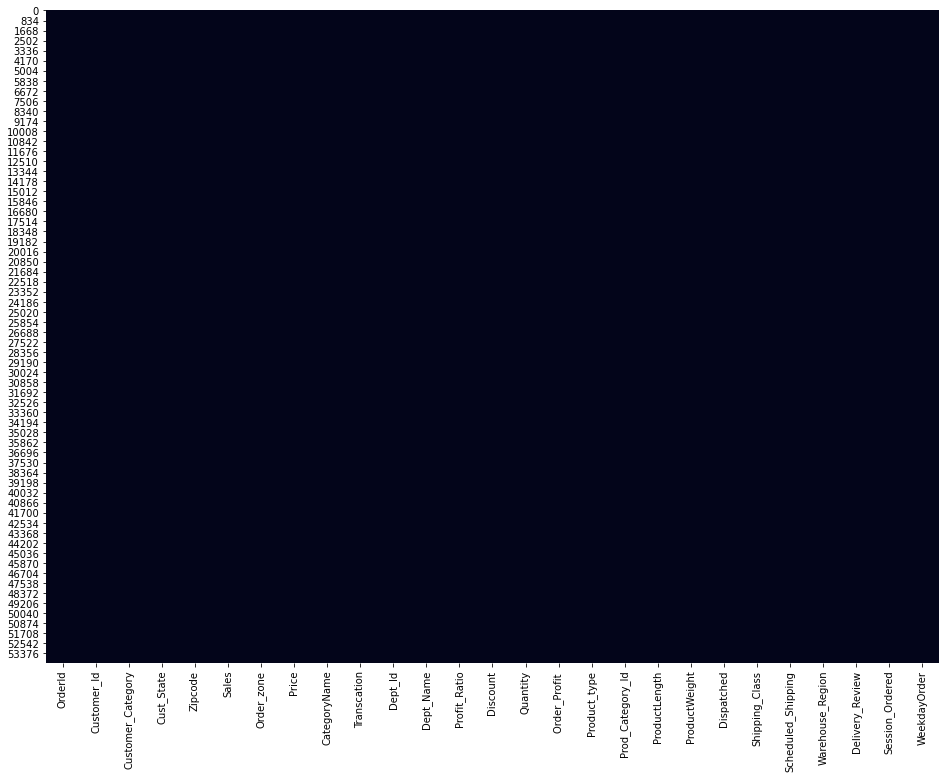

In [393]:
sns.heatmap(test.isnull(),cbar=False)

In [394]:
test['Zero_features']=(test==0).astype(int).sum(axis=1)
test.head()

,OrderId,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,Dept_Id,Dept_Name,Profit_Ratio,Discount,Quantity,Order_Profit,Product_type,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder,Zero_features
0,2372881,2989,others,HR,735,173.000000,West,2833.080000,Cat-3,UPI,5,Golf,-0.680000,0.070000,5,-1920.910000,Fragile,29,25.000000,1720.000000,0,Standard,6,NORTH,5.000000,2.000000,1,1
1,2445349,5359,Consumer,MA,737,222.000000,Central,14133.420000,Cat-49,Debit,7,Fan Shop,0.080000,0.060000,1,1132.140000,Fragile,48,29.000000,964.000000,1,Standard,4,CENTRAL,3.000000,3.000000,0,1
2,2441537,4111,Corporate,GJ,91350,149.000000,East,3545.310000,Cat-50,Credit,7,Fan Shop,0.340000,0.060000,3,1204.390000,Fragile,46,121.000000,2994.000000,0,Standard,6,WEST,3.000000,1.000000,1,1
3,2461867,5377,Consumer,RJ,77860,162.000000,North,9234.050000,Cat-12,UPI,4,Apparel,0.390000,0.030000,1,3600.480000,Not Fragile,18,156.000000,1008.000000,0,Standard,5,CENTRAL,3.000000,3.000000,1,1
4,2461659,10563,Consumer,WB,47922,115.000000,North,9174.760000,Cat-12,UPI,4,Apparel,0.500000,0.060000,1,4586.330000,Fragile,18,114.000000,1354.000000,0,Standard,2,NE,3.000000,2.000000,1,1


In [395]:
test['CategoryName']=test['CategoryName'].apply(myfunc)

test['CategoryName'].head()

0     3
1    49
2    50
3    12
4    12
Name: CategoryName, dtype: int64

In [396]:
test_num=test[['Sales',
        'Price', 
       'Profit_Ratio', 'Discount', 'Order_Profit ', 
        'ProductLength', 'ProductWeight']]

test_num.head()

,Sales,Price,Profit_Ratio,Discount,Order_Profit,ProductLength,ProductWeight
0,173.000000,2833.080000,-0.680000,0.070000,-1920.910000,25.000000,1720.000000
1,222.000000,14133.420000,0.080000,0.060000,1132.140000,29.000000,964.000000
2,149.000000,3545.310000,0.340000,0.060000,1204.390000,121.000000,2994.000000
3,162.000000,9234.050000,0.390000,0.030000,3600.480000,156.000000,1008.000000
4,115.000000,9174.760000,0.500000,0.060000,4586.330000,114.000000,1354.000000


In [426]:
test_cat1=test[[ 'Dept_Id','Quantity',
           'Prod_Category_Id','Dispatched','CategoryName',
           'Scheduled_Shipping', 'Delivery_Review', 'Session_Ordered', 'WeekdayOrder' ]]

test_cat1.head()

,Dept_Id,Quantity,Prod_Category_Id,Dispatched,CategoryName,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder
0,5,5,29,0,3,6,5.000000,2.000000,1
1,7,1,48,1,49,4,3.000000,3.000000,0
2,7,3,46,0,50,6,3.000000,1.000000,1
3,4,1,18,0,12,5,3.000000,3.000000,1
4,4,1,18,0,12,2,3.000000,2.000000,1


In [412]:
test_cat2=test[['Transcation', 'Product_type', 'Shipping_Class','Zero_features']]

test_cat2.head()

,Transcation,Product_type,Shipping_Class,Zero_features
0,UPI,Fragile,Standard,1
1,Debit,Fragile,Standard,1
2,Credit,Fragile,Standard,1
3,UPI,Not Fragile,Standard,1
4,UPI,Fragile,Standard,1


In [413]:
testdummy2=pd.get_dummies(test_cat2,drop_first=True)

testdummy2.head()

,Zero_features,Transcation_Credit,Transcation_Debit,Transcation_UPI,Product_type_Not Fragile,Shipping_Class_2A,Shipping_Class_Elite,Shipping_Class_Standard
0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1
2,1,1,0,0,0,0,0,1
3,1,0,0,1,1,0,0,1
4,1,0,0,1,0,0,0,1


In [414]:
testdummy2.shape

(54156, 8)

In [415]:
nums1=test_num.columns
nums1

Index(['Sales', 'Price', 'Profit_Ratio', 'Discount', 'Order_Profit ',
       'ProductLength', 'ProductWeight'],
      dtype='object')

In [427]:
s=RobustScaler()

test_num[nums1]=s.fit_transform(test_num[nums1])

test_num.head()

,Sales,Price,Profit_Ratio,Discount,Order_Profit,ProductLength,ProductWeight
0,0.000000,-0.177033,-3.310345,-0.296545,-1.130743,-0.689655,0.034038
1,0.347518,0.885666,-0.689655,-0.379878,-0.043845,-0.643678,-0.355854
2,-0.170213,-0.110054,0.206897,-0.379878,-0.018124,0.413793,0.691078
3,-0.078014,0.424923,0.379310,-0.629878,0.834893,0.816092,-0.333161
4,-0.411348,0.419347,0.758621,-0.379878,1.185860,0.333333,-0.154719


In [428]:
test_num.shape

(54156, 7)

In [429]:
test_cat1.columns

Index(['Dept_Id', 'Quantity', 'Prod_Category_Id', 'Dispatched', 'CategoryName',
       'Scheduled_Shipping', 'Delivery_Review', 'Session_Ordered',
       'WeekdayOrder'],
      dtype='object')

In [430]:
X_train_cat1.columns

Index(['Dept_Id', 'Quantity', 'Prod_Category_Id', 'Dispatched', 'CategoryName',
       'Scheduled_Shipping', 'Delivery_Review', 'Session_Ordered',
       'WeekdayOrder'],
      dtype='object')

In [431]:
testdummy2.shape

(54156, 8)

In [432]:
oz=pd.concat([test_num,test_cat1,testdummy2],axis=1)

oz.head()

,Sales,Price,Profit_Ratio,Discount,Order_Profit,ProductLength,ProductWeight,Dept_Id,Quantity,Prod_Category_Id,Dispatched,CategoryName,Scheduled_Shipping,Delivery_Review,Session_Ordered,WeekdayOrder,Zero_features,Transcation_Credit,Transcation_Debit,Transcation_UPI,Product_type_Not Fragile,Shipping_Class_2A,Shipping_Class_Elite,Shipping_Class_Standard
0,0.000000,-0.177033,-3.310345,-0.296545,-1.130743,-0.689655,0.034038,5,5,29,0,3,6,5.000000,2.000000,1,1,0,0,1,0,0,0,1
1,0.347518,0.885666,-0.689655,-0.379878,-0.043845,-0.643678,-0.355854,7,1,48,1,49,4,3.000000,3.000000,0,1,0,1,0,0,0,0,1
2,-0.170213,-0.110054,0.206897,-0.379878,-0.018124,0.413793,0.691078,7,3,46,0,50,6,3.000000,1.000000,1,1,1,0,0,0,0,0,1
3,-0.078014,0.424923,0.379310,-0.629878,0.834893,0.816092,-0.333161,4,1,18,0,12,5,3.000000,3.000000,1,1,0,0,1,1,0,0,1
4,-0.411348,0.419347,0.758621,-0.379878,1.185860,0.333333,-0.154719,4,1,18,0,12,2,3.000000,2.000000,1,1,0,0,1,0,0,0,1


In [433]:
m.shape

(88454, 24)

In [434]:
oz.shape

(54156, 24)

In [435]:
test.OrderId.head()

0    2372881
1    2445349
2    2441537
3    2461867
4    2461659
Name: OrderId, dtype: int64

In [436]:
order_id = test.OrderId
y_pred_lgb1 =log.predict(oz)
submission1 = pd.DataFrame({'OrderId': order_id,'Delivery_Status': y_pred_lgb1})
submission1.head()

,OrderId,Delivery_Status
0,2372881,1
1,2445349,1
2,2441537,1
3,2461867,1
4,2461659,0


In [684]:
#model.predict(X_test)

In [437]:
filename = 'submission_rf41.csv'

submission1.to_csv(filename,index=False)

print('Saved file: ' + filename)


Saved file: submission_rf41.csv
